In [83]:
from thinkdsp import read_wave

fileName = "Guitar.wav"

myWave = read_wave(fileName)
myWave.make_audio()

Тепер побудуємо повний сегмент цього фрагменту:

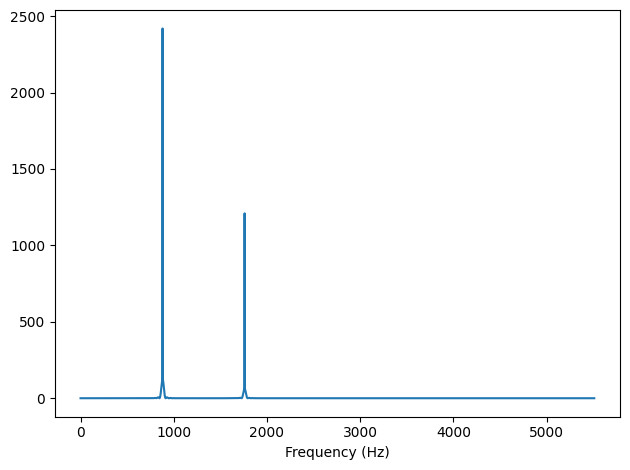

In [116]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

З отриманого wave, виділимо фрагмент, використовуючи метод segment:

In [85]:
segment = myWave.segment(start=3.2, duration=0.7)
segment.make_audio()

Тепер побудуємо спектр отриманого фрагмента:

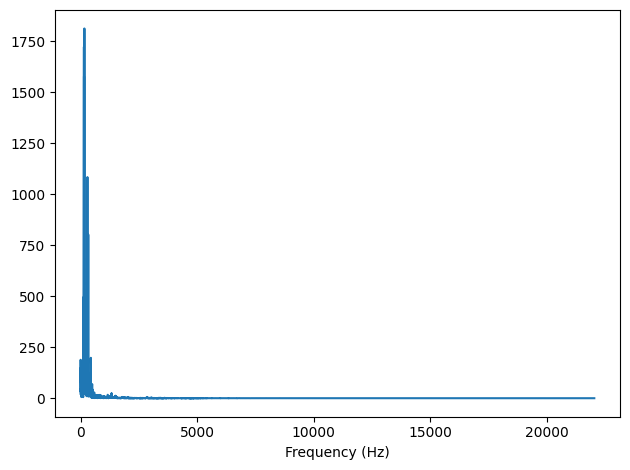

In [86]:
from thinkdsp import decorate

spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel="Frequency (Hz)")

Встановимо верхню межу:

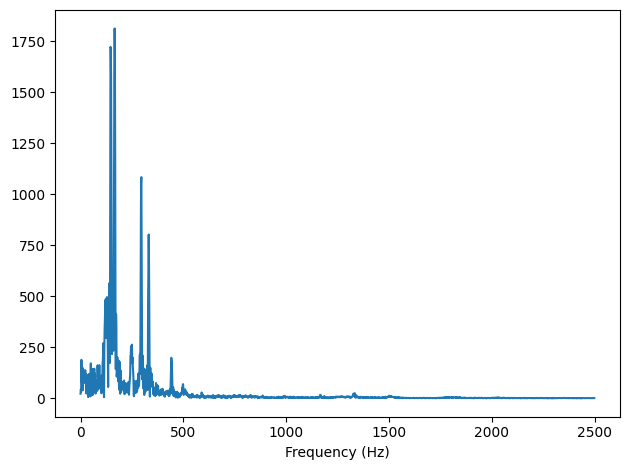

In [88]:
spectrum.plot(high=2500)
decorate(xlabel="Frequency (Hz)")

Наступним кроком ми застосуємо фільтр low_pass для того, щоб відкинути високі частоти:

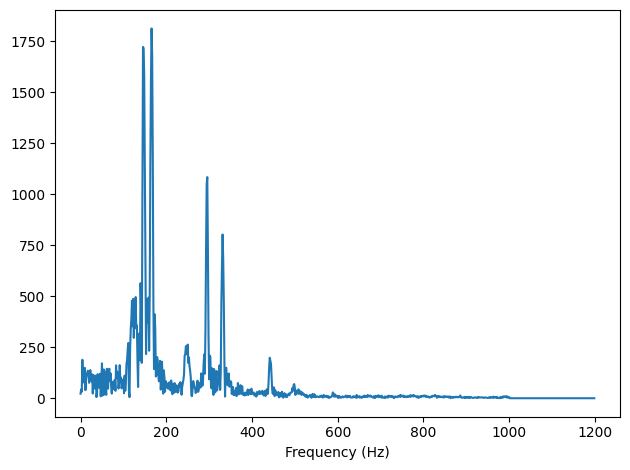

In [93]:
spectrum.low_pass(1000)
low_wave = spectrum.make_wave()
spectrum.plot(high=1200)
decorate(xlabel="Frequency (Hz)")

Застосуємо знову фільтр high_pass та побудуємо його сегмент:

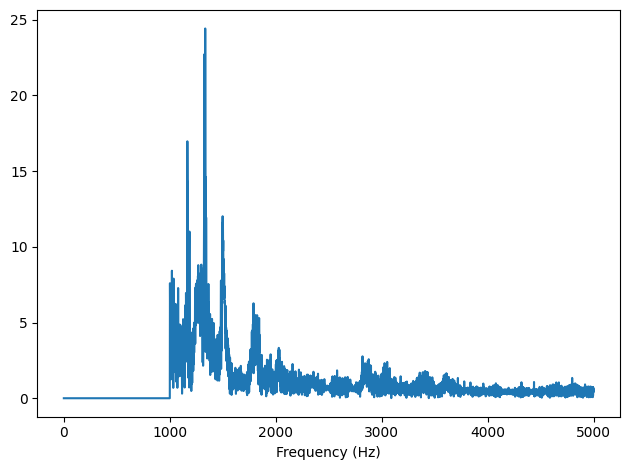

In [96]:
spectrum = segment.make_spectrum()
spectrum.high_pass(1000)
high_wave = spectrum.make_wave() 
spectrum.plot(high=5000)
decorate(xlabel="Frequency (Hz)")

Тепер нам залишилося ще тільки зробити фільтр band_stop:

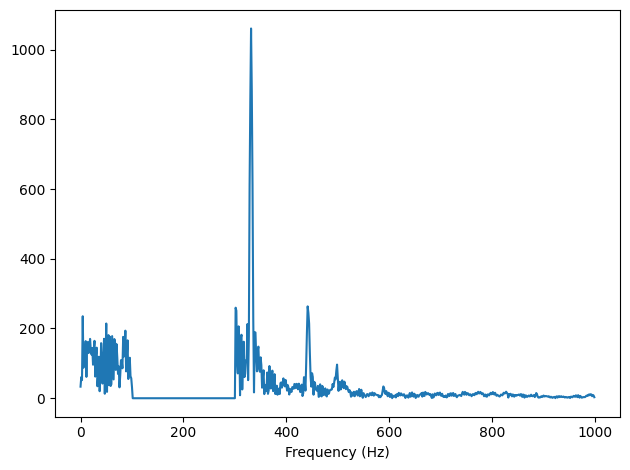

In [102]:
spectrum = segment.make_spectrum()
spectrum.band_stop(low_cutoff=100, high_cutoff=300)
band_wave = spectrum.make_wave() 
spectrum.plot(high=1000)
decorate(xlabel="Frequency (Hz)")

Перед відтворенням застосуємо apodize та normalize, щоб уникнути "кліків" під час відтворення:

In [101]:
segment.normalize()
segment.apodize()
low_wave.apodize()
low_wave.normalize()
high_wave.normalize()
high_wave.apodize()
band_wave.normalize()
band_wave.apodize()

Тепер прослухаємо фрагменти, які ми отримали:

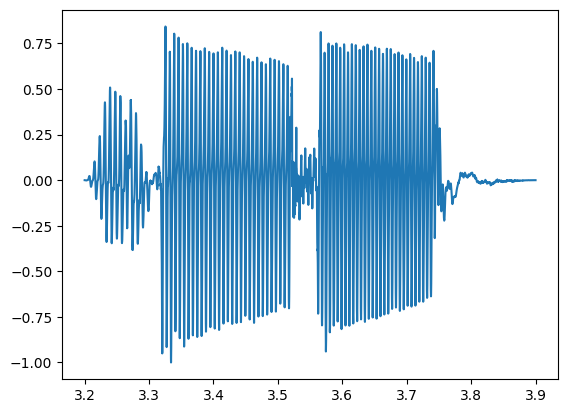

In [103]:
segment.plot()
segment.make_audio()

Тепер фільтр low_pass:

In [104]:
low_wave.make_audio()

Фільтр high_pass:

In [105]:
high_wave.make_audio()

І останнім прослухаємо фільтр band_stop:

In [106]:
band_wave.make_audio()

Тепер утворимо сигнал із комбінацій SinSignal та CosSignal:

In [107]:
from thinkdsp import SinSignal, CosSignal

cos_sig = CosSignal(freq=880, amp=1.0, offset=0)
sin_sig = SinSignal(freq=1760, amp=0.5, offset=0)


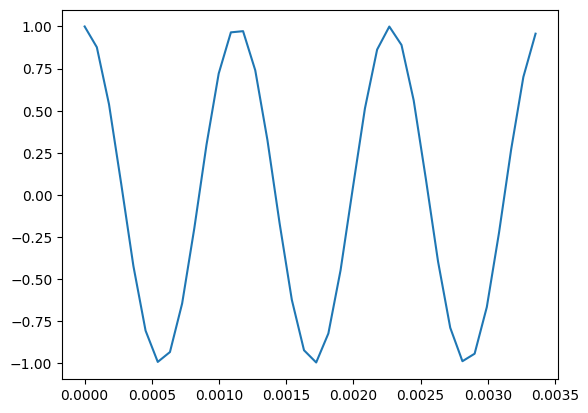

In [108]:
cos_sig.plot()

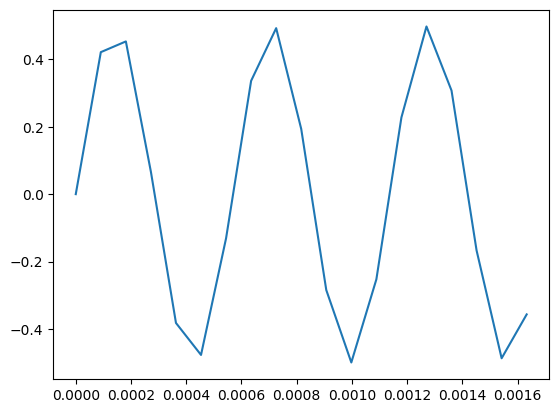

In [109]:
sin_sig.plot()

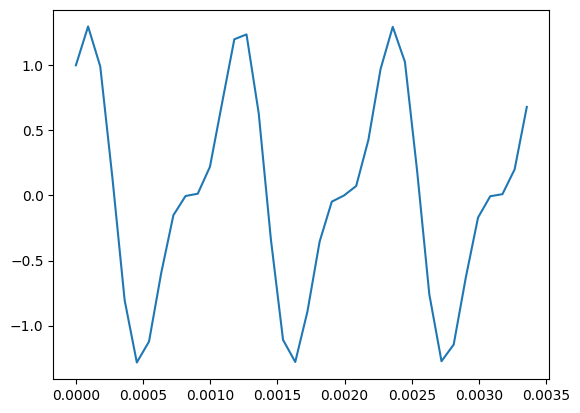

In [110]:
mix = sin_sig + cos_sig
mix.plot()

In [111]:
wave = mix.make_wave(duration=0.6, start=0 ,framerate=11025)
wave.apodize()
wave.normalize()
wave.make_audio()

Тепер створимо спектр нашого wave:

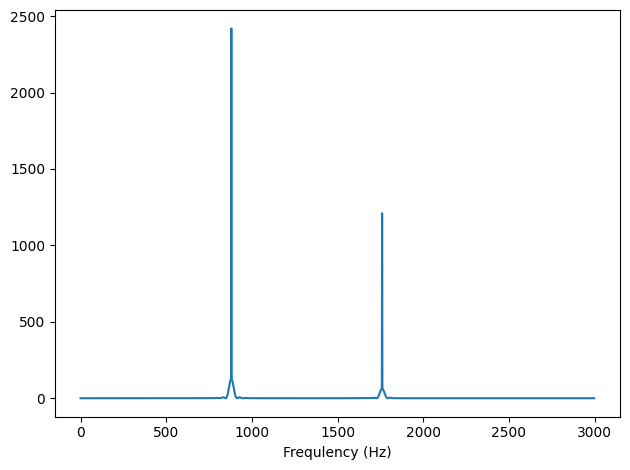

In [113]:
spectrum = wave.make_spectrum()
spectrum.plot(high=3000)
decorate(xlabel="Frequlency (Hz)")

Напишемо функцію stretch:

In [114]:
def stretch(wave, coefficient):
    wave.ts = wave.ts/coefficient
    wave.framerate = wave.framerate*coefficient

І протестуємо її виконання:

In [115]:
stretch(wave=wave, coefficient=4.0)
wave.make_audio()